# Table of Contents:

* [DESCRIPTION](#review)

* [PART 1](#part1): Task formalization and Evaluation criteria
     - [Task 1.1](#task11): Target variable selection
     - [Task 1.2](#task12): Selection of ML task type 
     - [Task 1.3](#task13): Selection of metric
   
* [PART 2](#part2): Explore and preprocess the data
     - [Task 2.1](#task21): Splitting data
     - [Task 2.2](#task22): Exploratory Data Analysis (EDA)  

* [PART 3](#part3): Train and compare the models
     - [Task 3.1](#task31): Selection of models and hyperparameters
     - [Task 3.2](#task32): Tuning hyperparameters by Cross-Validation
     - [Task 3.3](#task33): Results       

* [CONCLUSIONS](#conc)


---

# Description of the final project <a class="anchor" id="review"></a>

### Introduction
In this project, you will be asked to help a film-producing company. They would like to make sure that films, which they are creating are successful. The company has collected a large dataset, which includes information about more than 80'000 films: their description, genre, budget, rating, etc.

Your task will be to suggest and justify a way to measure the success of the film and build a machine learning model, which is capable of predicting this quantity.

### Detailed Task Description

The solution should have the following parts:

#### [20 %] Formalise the task and suggest the evaluation criterion
* What is your target variable? Why is it a good measure of success and how the film-producing company can use it to make their decision?
* Which task are you going to solve (is it a regression, classification or something else)?
* Which metric will you use to evaluate the performance of the model? Do you have any idea, which values of the metrics can be considered good enough? 


#### [40 %] Explore and preprocess the data 
* Split data into train and test
* Fill missing values (if there are any)
* Remove irrelevant feature (if there are any) and create new ones (explore which features you have, what is their distribution and connection to the target, explain why newly created features are reasonable)
* Properly encode categorical features (if required)


#### [40 %] Train the models and present result of your work
* Use the models introduced during the course, which are relevant for the task you are solving
* You are supposed to compare at least 3 models
* Tune (or explain why there is no need to tune) hyperparameters of each model
* Use cross-validation to compare models and select hyperparameters
* Which model and setup is the best? How does it perform on the test dataset? 



#### General Requirements
* You should provide a solution in the form of the Jupyter Notebook (use the template that we provide)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question / perform required actions from the task
* Support all your statements with calculations and plots. 

For example: If you claim that the dataset does not have missing values, you need to provide code which shows that the total number of missing values is zero.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

This is a template for your final project. 

In [2]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


---



# PART 1. Task formalization and Evaluation criteria <a class="anchor" id="part1"></a>

### Task 1.1: Target variable selection <a class="anchor" id="task11"></a>
Select your target variable, explain your choice. Separate target variable from the feature matrix.

1.1.1. Let's see what fields are contained in our table and how they are filled:

In [3]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60198 entries, 0 to 60197
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          60198 non-null  object 
 1   title                  60198 non-null  object 
 2   original_title         60198 non-null  object 
 3   year                   60198 non-null  int64  
 4   date_published         60198 non-null  object 
 5   genre                  60198 non-null  object 
 6   duration               60198 non-null  int64  
 7   country                60193 non-null  object 
 8   language               59759 non-null  object 
 9   director               60174 non-null  object 
 10  writer                 59390 non-null  object 
 11  production_company     57454 non-null  object 
 12  actors                 60168 non-null  object 
 13  description            58205 non-null  object 
 14  avg_vote               60198 non-null  float64
 15  vo

In [4]:
columns = ['avg_vote', 'votes', 'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore']

describe_info = full_dataset[columns].describe(include='all')
describe_info.loc['num_nulls'] = full_dataset.shape[0] - describe_info.loc['count']
describe_info.loc['nulls_ratio'] = describe_info.loc['num_nulls'] / full_dataset.shape[0]
describe_info

,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore
count,60198.000000,6.019800e+04,16819,11892,19136,8812.000000
unique,NaN,NaN,3503,11529,18920,NaN
top,NaN,NaN,$ 1000000,$ 1000000,$ 8144,NaN
freq,NaN,NaN,512,19,16,NaN
mean,5.997349,1.049150e+04,NaN,NaN,NaN,55.532229
std,1.199483,5.686771e+04,NaN,NaN,NaN,17.885123
min,1.000000,1.000000e+02,NaN,NaN,NaN,1.000000
25%,5.400000,2.060000e+02,NaN,NaN,NaN,43.000000
50%,6.200000,5.030000e+02,NaN,NaN,NaN,56.000000
75%,6.800000,2.000000e+03,NaN,NaN,NaN,68.000000


1.1.2. We see several variables that can be used to assess the success of the movie (description taken from Kaggle):
* **`avg_vote`** - average film rating calculated by viewers' votes;
* **`worlwide_gross_income`** - world box office receipts of the film (to calculate the profit, it is necessary to take into account the budget of the film for production and marketing);
* **`metascore`** - average film rating, calculated by  movie critics' votes.


1.1.3. We will choose **`avg_vote`** to form the target variable for several reasons:

1. **`avg_vote`** shows whether users liked the movie or not;
2. **`worlwide_gross_income`** does not include the cost of film production and marketing. Also, the box office may reflect the popularity of a particular franchise or the star cast of a film, rather than the success of the film itself. Because of this, the model for predicting the success of a film may be more likely to be mistaken, for example, in favor of low-rated films with “past box office success”, which can negatively affect the prediction results.
3. **`metascore`** shows the opinion of professional film critics only, which can be very different from the tastes of most viewers, which generate the main income for film campaigns.
4. We also see that **`worlwide_gross_income`** and **`metascore`** have a large percentage of nulls (68% and 85%, respectively), which can cause the results to be highly biased due to the non-representativeness of the sample for development model and general population.
5. **`avg_vote`** does not have nulls;


1.1.4 Since we need to determine whether the movie will succeed or not, let's convert our numeric **`avg_vote`** field to a binary variable.

For this let's use some heuristic based on the Pareto principle (20:80): we will assume that the top 20% of films are successful (bring in most of the profit), and the remaining 80% will be unsuccessful.

Let's calculate the rating threshold for the 80-percentile:

In [5]:
cutoff = np.percentile(full_dataset.avg_vote, 80)
print(f'avg_vote cutoff for 80-percentile: {cutoff}')

avg_vote cutoff for 80-percentile: 7.0


**Note:** We got an interesting result: usually films with a rating above 7 are considered good on the IMDB. But maybe this is just a coincidence.

1.1.5. So now we can define the target variable:  
- **1** - if `avg_vote` >= 7 (successful film)  
- **0** - if `avg_vote` < 7 (unsuccessful film)

1.1.6. Let's create a matrix of features and a vector for the target variable:

In [6]:
X = full_dataset.drop("avg_vote", axis=1)
y = full_dataset.avg_vote.map(lambda x: 1 if x >= 7 else 0)

### Task 1.2: Selection of ML task type <a class="anchor" id="task12"></a>
Explain which task are you going to solve (is it a regression, classification or something else)?

1.2.1. Since we have created a binary target variable, we will be solving a binary classification problem.

For the binary classification problem, we will use three types of models:
* **`Logistic Regression`**
* **`Decision Tree Classifier`**
* **`Gradient Boosting Classifier`**

### Task 1.3: Selection of metric <a class="anchor" id="task13"></a>
Select a metric. Is it already implemented in sklearn? If yes, import it. If not, it is time to write a function which will calculate it. 

1.3.1. We have imbalanced data: there are 4 times less successful films than unsuccessful ones).  
For such a task, it is good to use metrics based on `Precision` and `Recall` metrics.  
Therefore, we will take the following metrics:
1. **`Precision`** is a threshold metric that shows what proportion of films predicted by the model as successful actually turned out to be successful.
2. **`Recall`** is a threshold metric that shows what proportion of all successful films the model correctly predicted.
3. **`F1 score`** is the harmonic mean of the `Precision` and `Recall`.
4. **`AUC PR`** (aka `Average Precision`) - an integral metric that estimates the area under the PR curve.


In [7]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score


**Note.** For the threshold metric (`Precision`, `Recall`, and `F1 score`), the threshold is equal 0.5 by default, which may not be the optimal value. Therefore, we separately calculate the integral metric `AUC PR`, which does not depend on the threshold.

1.3.2. Other popular metrics for classification, such as `Accuracy` and `AUC ROC`, may show overestimated values on imbalanced data (so they are not suitable for our task). This has been experimentally shown in the paper:  
*Takaya Saito and Marc Rehmsmeier. 2015. The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets. PLoS ONE 10(3) (2015). https://doi.org/10.1371/journal.pone.0118432*

---



# PART 2. Explore and preprocess the data <a class="anchor" id="part3"></a>

### Task 2.1: Splitting data<a class="anchor" id="task21"></a>


Since our dataset contains 60198 observations and will contain several dozen features after transformations, we need enough data for training sample. Taking into account Frank Harrell's rule (the minimum number of observations of a minority class per one feature), it seems optimal for the test sample to select no more than 15% of observations so that more data gets into the training sample.

2.1.1. Let's split data into train and test 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [10]:
tr_o = X_train.shape[0]
tr_s = y_train.value_counts()[1]
tr_u = y_train.value_counts()[0]
tr_c = X_train.shape[1]

t_o = X_test.shape[0]
t_s = y_test.value_counts()[1]
t_u = y_test.value_counts()[0]
t_c = X_test.shape[1]

print('=================================================================================')
print('\t\t\tObservations\tSuccessful\tUnsuccessful\tColumns')
print('---------------------------------------------------------------------------------')
print(f'Train sample\t\t{tr_o}\t\t{tr_s}\t\t{tr_u}\t\t{tr_c}')
print(f'Test sample\t\t{t_o}\t\t{t_s}\t\t{t_u}\t\t{t_c}')
print('=================================================================================')

			Observations	Successful	Unsuccessful	Columns
---------------------------------------------------------------------------------
Train sample		51168		10678		40490		21
Test sample		9030		1885		7145		21


### Task 2.2: Exploratory Data Analysis (EDA) <a class="anchor" id="task22"></a>
Explore you data: make plots, print tables. Make sure to write your observations. Do not forget to fill-in missing values, define relevant columns transformatios.


2.2.1. We will divide our data exploration into three parts:
1. Removal of uninformative data;
2. Exploration and transformation of categorical features;
3. Exploration and transformation of numeric features.

2.2.2. Removal of uninformative data

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51168 entries, 47346 to 52766
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          51168 non-null  object 
 1   title                  51168 non-null  object 
 2   original_title         51168 non-null  object 
 3   year                   51168 non-null  int64  
 4   date_published         51168 non-null  object 
 5   genre                  51168 non-null  object 
 6   duration               51168 non-null  int64  
 7   country                51165 non-null  object 
 8   language               50806 non-null  object 
 9   director               51148 non-null  object 
 10  writer                 50471 non-null  object 
 11  production_company     48816 non-null  object 
 12  actors                 51147 non-null  object 
 13  description            49456 non-null  object 
 14  votes                  51168 non-null  int64  
 15

We need to remove the following columns:
1. Technical fields:
   * `imdb_title_id`
2. Non-informative data:
   * `year` - a movie from the future will contain a year that was not in the training data
   * `date_published` - a movie from the future will contain a date published that was not in the training data
3. Information from the future (which is not present at the time of production of the film):
   * `votes`
   * `usa_gross_income`
   * `worlwide_gross_income`   
   * `metascore`
   * `reviews_from_users`   
   * `reviews_from_critics`


In [12]:
removal_columns = ['imdb_title_id', 'year', 'date_published', 'votes', 'usa_gross_income',
                   'worlwide_gross_income', 'metascore', 'reviews_from_users', 'reviews_from_critics']
X_train.drop(removal_columns, axis=1, inplace=True)
X_test.drop(removal_columns, axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51168 entries, 47346 to 52766
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               51168 non-null  object
 1   original_title      51168 non-null  object
 2   genre               51168 non-null  object
 3   duration            51168 non-null  int64 
 4   country             51165 non-null  object
 5   language            50806 non-null  object
 6   director            51148 non-null  object
 7   writer              50471 non-null  object
 8   production_company  48816 non-null  object
 9   actors              51147 non-null  object
 10  description         49456 non-null  object
 11  budget              14239 non-null  object
dtypes: int64(1), object(11)
memory usage: 5.1+ MB


2.2.2. Exploration and transformation of categorical features

In [14]:
cat_columns = X_train.select_dtypes('object').columns.to_list()

describe_info = X_train[cat_columns].describe()
describe_info.loc['num_nulls'] = X_train.shape[0] - describe_info.loc['count']
describe_info.loc['nulls_ratio'] = describe_info.loc['num_nulls'] / X_train.shape[0]
describe_info

,title,original_title,genre,country,language,director,writer,production_company,actors,description,budget
count,51168,51168,51168,51165,50806,51148,50471,48816,51147,49456,14239
unique,49051,49052,1155,2930,2840,20640,41182,19085,51132,49394,3125
top,Wanted,Wanted,Drama,USA,English,Jesús Franco,Jing Wong,Metro-Goldwyn-Mayer (MGM),"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Ka...",Based on,$ 1000000
freq,7,7,7197,18691,22874,76,60,1080,10,6,436
num_nulls,0,0,0,3,362,20,697,2352,21,1712,36929
nulls_ratio,0,0,0,5.86304e-05,0.00707473,0.000390869,0.0136218,0.0459662,0.000410413,0.0334584,0.721721


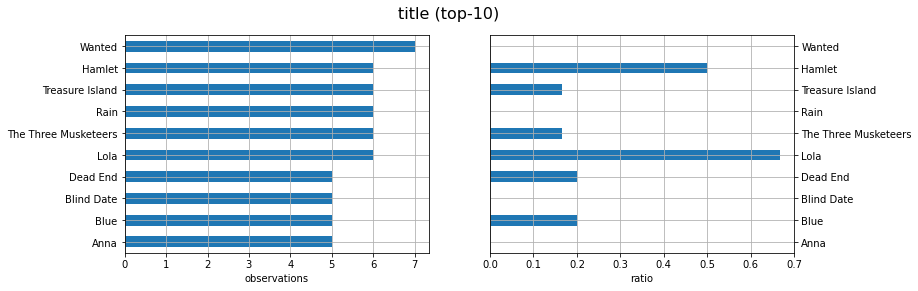

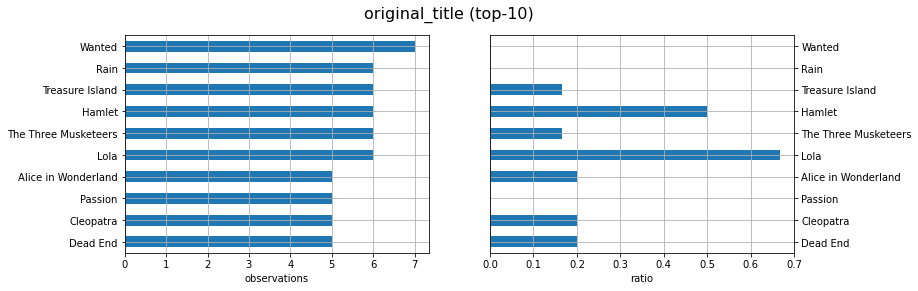

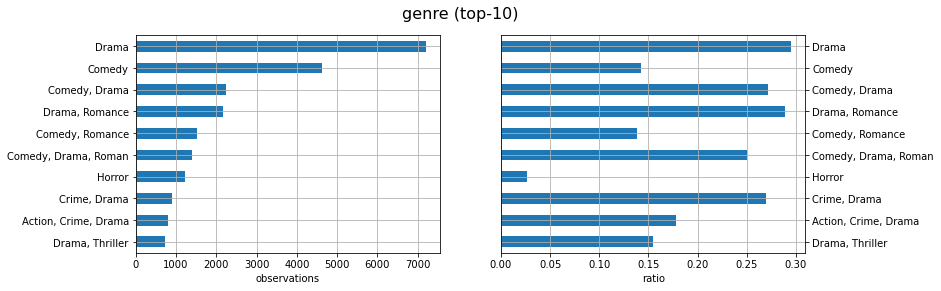

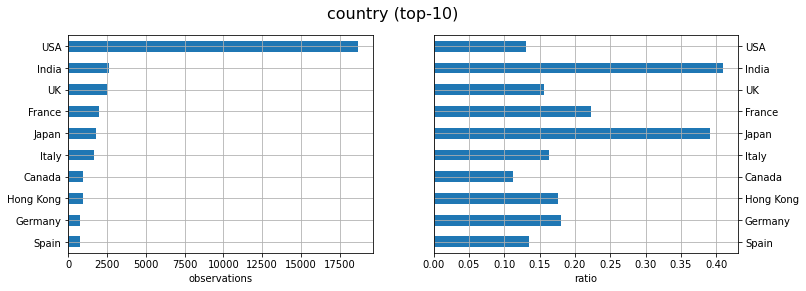

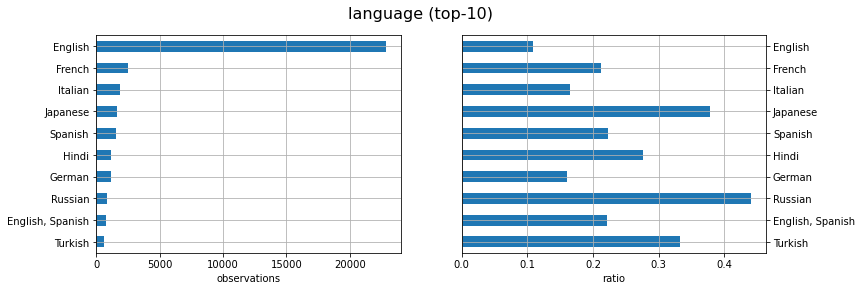

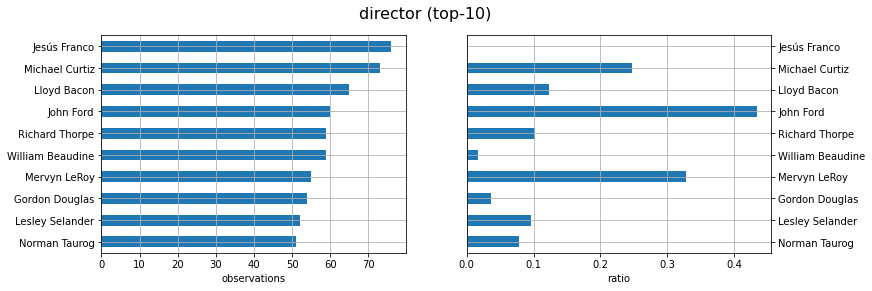

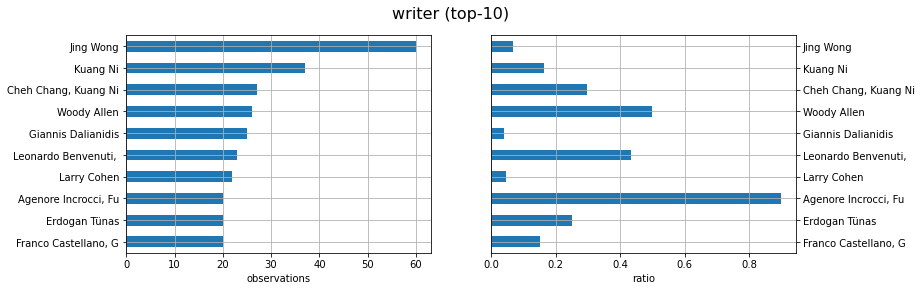

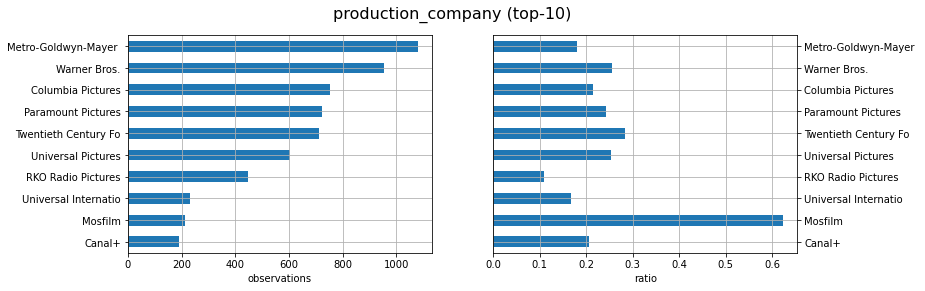

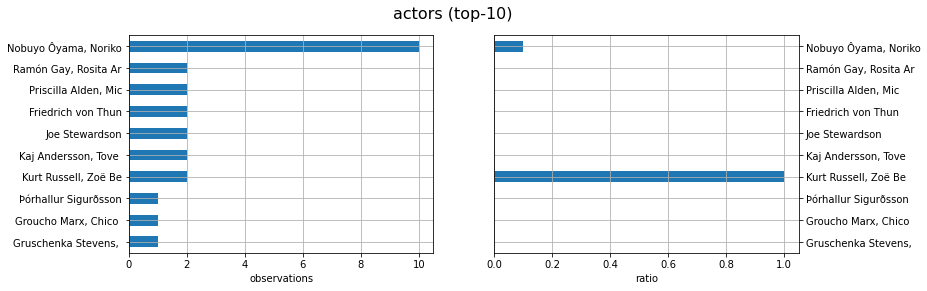

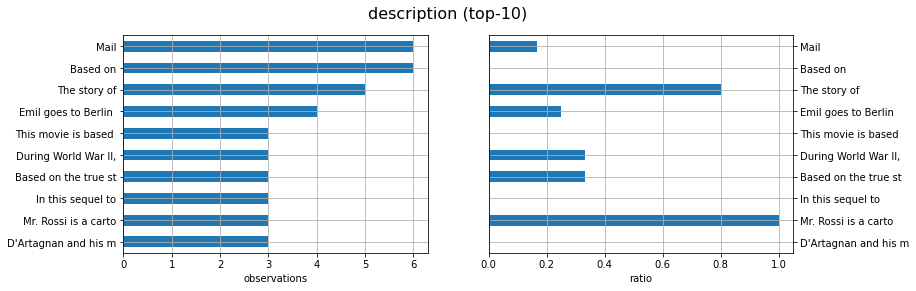

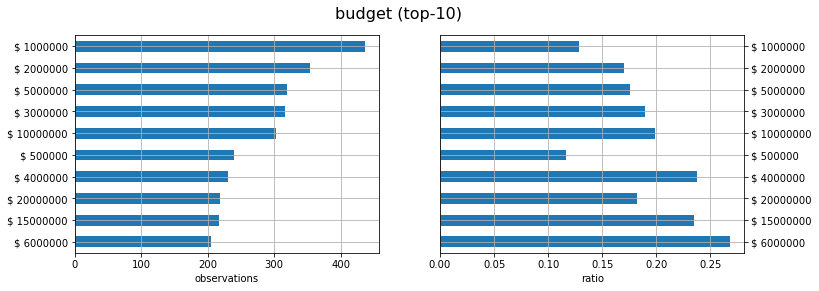

In [15]:
max_len = 20
top = 10

for c in cat_columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'{c} (top-{top})', fontsize=16)
    pivot = X_train.assign(cnt=1, target=y_train).pivot_table(index=c, columns='target', values='cnt',
                                                              aggfunc='count', fill_value=0)
    pivot['num_obs'] = pivot.sum(axis=1)
    pivot['ratio_target'] = pivot[1] / pivot.num_obs
    pivot.sort_values('num_obs', inplace=True)
    pivot = pivot.tail(top)
    pivot.num_obs.plot.barh(ax=ax[0])
    
    labels = []
    for label in ax[0].get_yticklabels():
        text = label.get_text()
        if len(text) > max_len:
            label.set_text(text[:max_len])
        labels.append(label)
    
    ax[0].set_yticklabels(labels)
    ax[0].set_ylabel('')
    ax[0].set_xlabel('observations')
    ax[0].grid()
    
    pivot.ratio_target.plot.barh(ax=ax[1])
    
    labels = []
    for label in ax[1].get_yticklabels():
        text = label.get_text()
        if len(text) > max_len:
            label.set_text(text[:max_len])
        labels.append(label)
    
    ax[1].set_yticklabels(labels)
    ax[1].set_ylabel('')
    ax[1].set_xlabel('ratio')
    ax[1].yaxis.tick_right()
    ax[1].grid()

2.2.2.1. Let's remove the columns that contain many unique values:
* **`title`**
* **`original_title`**
* **`writer`**
* **`actors`**
* **`description`**	

**Note.** We do not use NLP techniques for this text data, so we cannot properly process and group them according to their meaning.


In [16]:
removal_columns = ['title', 'original_title', 'writer', 'actors', 'description']
X_train.drop(removal_columns, axis=1, inplace=True)
X_test.drop(removal_columns, axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2.2.2.2. Let's also remove the **`budget`** column, since it contains different types of currencies that would be difficult to bring to a single currency, due to different exchange rates at different times and inflation. This column also contains many blank values.


In [17]:
X_train.drop('budget', axis=1, inplace=True)
X_test.drop('budget', axis=1, inplace=True)

Let's transform the rest of the features

2.2.2.3. Let's binarize the **`genre`** feature using the MultiLabelBinarizer method.  
Since binning can give a lot of weakly informative features, let's remove features that contain many zeros (> 99%).

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

vector = MultiLabelBinarizer(sparse_output=True)
X_train.genre = X_train.genre.str.split(', ')
X_test.genre = X_test.genre.str.split(', ')
X_train = X_train.merge(pd.DataFrame.sparse.from_spmatrix(vector.fit_transform(X_train.genre), 
                                                          X_train.index, 'genre_' + vector.classes_), 
                        how='inner', left_index=True, right_index=True)
X_test = X_test.merge(pd.DataFrame.sparse.from_spmatrix(vector.transform(X_test.genre), X_test.index, 
                                                        'genre_' + vector.classes_),
                      how='inner', left_index=True, right_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
zeros = 1 - X_train.astype(bool).sum(axis=0) / X_train.shape[0]
zeros = zeros[zeros > 0.99]

X_train.drop(zeros.index, axis=1, inplace=True)
X_test.drop(zeros.index, axis=1, inplace=True)

In [20]:
X_train.shape, X_test.shape

((51168, 27), (9030, 27))

2.2.2.4. Let's transform the **`country`**:
* binarize the feature using the MultiLabelBinarizer method;
* fill in the gaps with the most frequent value: 'USA'

Since binning can give a lot of weakly informative features, let's remove features that contain many zeros (> 99%).

In [21]:
vector = MultiLabelBinarizer(sparse_output=True)

X_train.country.fillna('USA', inplace=True)
X_test.country.fillna('USA', inplace=True)
X_train.country = X_train.country.str.split(', ')
X_test.country = X_test.country.str.split(', ')
X_train = X_train.merge(pd.DataFrame.sparse.from_spmatrix(vector.fit_transform(X_train.country), 
                                                          X_train.index, 'country_' + vector.classes_),
                        how='inner', left_index=True, right_index=True)
X_test = X_test.merge(pd.DataFrame.sparse.from_spmatrix(vector.transform(X_test.country), 
                                                        X_test.index, 'country_' + vector.classes_),
                      how='inner', left_index=True, right_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:994: UserWarning: unknown class(es) ['Fiji', 'Papua New Guinea', 'Uganda'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


In [22]:
zeros = 1 - X_train.astype(bool).sum(axis=0) / X_train.shape[0]
zeros = zeros[zeros > 0.99]

X_train.drop(zeros.index, axis=1, inplace=True)
X_test.drop(zeros.index, axis=1, inplace=True)

In [23]:
X_train.shape, X_test.shape

((51168, 47), (9030, 47))

2.2.2.5. Let's transform the **`language`**:
* binarize the feature using the MultiLabelBinarizer method;
* fill in the gaps with the most frequent value: 'English'

Since binning can give a lot of weakly informative features, let's remove features that contain many zeros (> 99%).

In [24]:
vector = MultiLabelBinarizer(sparse_output=True)

X_train.language.fillna('English', inplace=True)
X_test.language.fillna('English', inplace=True)
X_train.language = X_train.language.str.split(', ')
X_test.language = X_test.language.str.split(', ')
X_train = X_train.merge(pd.DataFrame.sparse.from_spmatrix(vector.fit_transform(X_train.language),
                                                          X_train.index, 'language_' + vector.classes_),
                        how='inner', left_index=True, right_index=True)
X_test = X_test.merge(pd.DataFrame.sparse.from_spmatrix(vector.transform(X_test.language),
                                                        X_test.index, 'language_' + vector.classes_),
                      how='inner', left_index=True, right_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:994: UserWarning: unknown class(es) ['Creek', 'Kabyle', 'Kuna', 'Rotuman', 'Shanxi', 'Shoshoni'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


In [25]:
zeros = 1 - X_train.astype(bool).sum(axis=0) / X_train.shape[0]
zeros = zeros[zeros > 0.99]

X_train.drop(zeros.index, axis=1, inplace=True)
X_test.drop(zeros.index, axis=1, inplace=True)

In [26]:
X_train.shape, X_test.shape

((51168, 65), (9030, 65))

2.2.2.6. Let's remove the original columns by which the transformations were made.  

In [27]:
removal_columns = ['genre', 'country', 'language']
X_train.drop(removal_columns, axis=1, inplace=True)
X_test.drop(removal_columns, axis=1, inplace=True)

In [28]:
X_train.shape, X_test.shape

((51168, 62), (9030, 62))

2.2.3. Exploration and transformation of numeric features

In [29]:
numeric_columns = X_train.select_dtypes('int64').columns.to_list()

In [30]:
describe_info = X_train[numeric_columns].describe()
describe_info.loc['num_nulls'] = X_train.shape[0] - describe_info.loc['count']
describe_info.loc['nulls_ratio'] = describe_info.loc['num_nulls'] / X_train.shape[0]
describe_info

,duration
count,51168.000000
mean,99.763465
std,22.604868
min,40.000000
25%,88.000000
50%,96.000000
75%,107.000000
max,729.000000
num_nulls,0.000000
nulls_ratio,0.000000


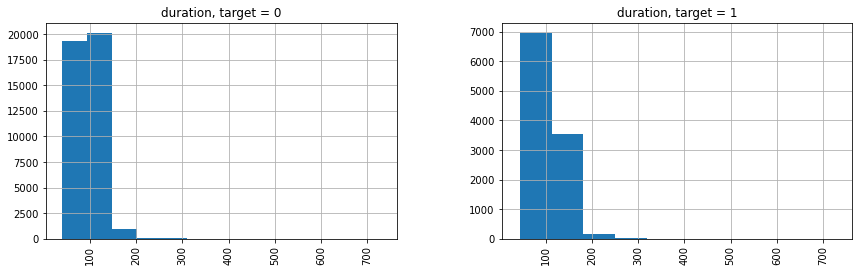

In [31]:
ax = X_train.assign(target=y_train).hist(column='duration', by='target', sharex=True, figsize=(14, 4))
ax[0].set_title(f'duration, target = {ax[0].get_title()}')
ax[0].grid()
ax[1].set_title(f'duration, target = {ax[1].get_title()}')
ax[1].grid()

2.2.3.1. We see that **`duration`** is distributed abnormally, so let's make standardization using StandardScaler method:

Let's also transform the remaining categorical variables using the TargetEncoder method (null values will be filled with the target mean):
* **`production_company`**
* **`director`**


In [32]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer(
    [('duration', StandardScaler(), ['duration']),
     ('target_encoders', TargetEncoder(), ['production_company', 'director'])],
    remainder="passthrough")

---



# PART 3. Train and compare the models <a class="anchor" id="part3"></a>

For the binary classification problem, we will use three types of models:
* **`Logistic Regression`**
* **`Decision Tree Classifier`**
* **`Gradient Boosting Classifier`**

### Task 3.1. Selection models and hyperparameters <a class="anchor" id="task31"></a>

Select models, you are going to train, select hyperparameters that have to be tunes


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

3.1.1. Pipeline for **`Logistic Regression`**

For `Logistic Regression`, let's tune the L2-regularization hyperparameter, which reduce the overfitting.

In [34]:
logreg_pipe = Pipeline([('column_transformer', column_transformer), 
                        ('estimator', LogisticRegression(n_jobs=-1))])

logreg_grid = {'estimator__penalty': ['none', 'l2'], 
               'estimator__C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

3.1.2. Pipeline for **`Decision Tree Classifier`**

For `Decision Tree Classifier`, let's tune next parameters for reducing the overfitting:
* max_depth
* min_samples_leaf
* min_impurity_decrease

In [35]:
tree_pipe = Pipeline([('column_transformer', column_transformer), 
                      ('estimator', DecisionTreeClassifier(random_state=42))])

tree_grid = {'estimator__criterion': ['gini', 'entropy'],
             'estimator__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
             'estimator__min_samples_leaf': [3, 5, 10, 20, 40],
             'estimator__min_impurity_decrease': [0.0, 0.01, 0.1]}

3.1.3. Pipeline for **`Gradient Boosting Classifier`**

For `Gradient Boosting Classifier`, let's tune next hyperparameters for reducing the overfitting and improve convergence:
* n_estimators
* max_depth
* learning_rate
* min_impurity_decrease

In [48]:
boosting_pipe = Pipeline([('column_transformer', column_transformer), 
                          ('estimator', GradientBoostingClassifier(random_state=42))])

boosting_grid = {'estimator__n_estimators': [100, 200, 300],
                 'estimator__max_depth': [3, 4, 5],
                 'estimator__learning_rate': [0.05, 0.1, 1],
                 'estimator__min_impurity_decrease': [0.0, 0.01]}

### Task 3.2. Tuning hyperparameters by Cross-Validation <a class="anchor" id="task32"></a>

Use cross-validation to compare models and select best set of hyperparameters

3.2.1. Let's use a 5-fold cross-validation scheme. For tuning the hyperparameters we will use F1-score.


In [37]:
from sklearn.model_selection import GridSearchCV

3.2.2. **`Logistic Regression`**

In [40]:
logreg_cv = GridSearchCV(logreg_pipe, param_grid=logreg_grid, scoring='f1', cv=5, n_jobs=-1)
logreg_cv.fit(X_train, y_train)
print('best_score: ', logreg_cv.best_score_)
print('=======================================')
print(logreg_cv.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score:  0.4603693724844626
Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('duration', StandardScaler(),
                                                  ['duration']),
                                                 ('target_encoders',
                                                  TargetEncoder(),
                                                  ['production_company',
                                                   'director'])])),
                ('estimator',
                 LogisticRegression(C=0.01, n_jobs=-1, penalty='none'))])


3.2.3. **`Decision Tree Classifier`**

In [41]:
tree_cv = GridSearchCV(tree_pipe, param_grid=tree_grid, scoring='f1', cv=5, n_jobs=-1)
tree_cv.fit(X_train, y_train)
print('best_score: ', tree_cv.best_score_)
print('=======================================')
print(tree_cv.best_estimator_)

best_score:  0.4961438140554105
Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('duration', StandardScaler(),
                                                  ['duration']),
                                                 ('target_encoders',
                                                  TargetEncoder(),
                                                  ['production_company',
                                                   'director'])])),
                ('estimator',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=40,
                                        random_state=42))])


3.2.4. **`Gradient Boosting Classifier`**

In [42]:
boosting_cv = GridSearchCV(boosting_pipe, param_grid=boosting_grid, scoring='f1', cv=5, n_jobs=-1)
boosting_cv.fit(X_train, y_train)
print('best_score: ', boosting_cv.best_score_)
print('=======================================')
print(boosting_cv.best_estimator_)

best_score:  0.4843777703430625
Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('duration', StandardScaler(),
                                                  ['duration']),
                                                 ('target_encoders',
                                                  TargetEncoder(),
                                                  ['production_company',
                                                   'director'])])),
                ('estimator',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))])


In [49]:
boosting_cv = GridSearchCV(boosting_pipe, param_grid=boosting_grid, scoring='f1', cv=5, n_jobs=-1)
boosting_cv.fit(X_train, y_train)
print('best_score: ', boosting_cv.best_score_)
print('=======================================')
print(boosting_cv.best_estimator_)

best_score:  0.48601774396857317
Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('duration', StandardScaler(),
                                                  ['duration']),
                                                 ('target_encoders',
                                                  TargetEncoder(),
                                                  ['production_company',
                                                   'director'])])),
                ('estimator',
                 GradientBoostingClassifier(min_impurity_decrease=0.01,
                                            n_estimators=300,
                                            random_state=42))])


### Task 3.3. Results <a class="anchor" id="task33"></a>

Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?

3.3.1. Let's calculate 4 selected metrics on training and test samples for each trained model:
1. **`Precision`**
2. **`Recall`** 
3. **`F1 score`**
4. **`AUC PR`** 

3.3.2. **`Logistic Regression`**

In [143]:
y_pred_logreg_tr = logreg_cv.predict(X_train)
pr_logreg_tr = round(precision_score(y_train, y_pred_logreg_tr), 6)
rec_logreg_tr = round(recall_score(y_train, y_pred_logreg_tr), 6)
f1_logreg_tr = round(f1_score(y_train, y_pred_logreg_tr), 6)

y_pred_logreg_t = logreg_cv.predict(X_test)
pr_logreg_t = round(precision_score(y_test, y_pred_logreg_t), 6)
rec_logreg_t = round(recall_score(y_test, y_pred_logreg_t), 6)
f1_logreg_t = round(f1_score(y_test, y_pred_logreg_t), 6)

y_pred_logreg_tr_p = logreg_cv.predict_proba(X_train)
aps_logreg_tr = round(average_precision_score(y_train, y_pred_logreg_tr_p[:,1]), 6)

y_pred_logreg_t_p = logreg_cv.predict_proba(X_test)
aps_logreg_t = round(average_precision_score(y_test, y_pred_logreg_t_p[:,1]), 6)


3.3.3. **`Decision Tree Classifier`**

In [144]:
y_pred_tree_tr = tree_cv.predict(X_train)
pr_tree_tr = round(precision_score(y_train, y_pred_tree_tr), 6)
rec_tree_tr = round(recall_score(y_train, y_pred_tree_tr), 6)
f1_tree_tr = round(f1_score(y_train, y_pred_tree_tr), 6)

y_pred_tree_t = tree_cv.predict(X_test)
pr_tree_t = round(precision_score(y_test, y_pred_tree_t), 6)
rec_tree_t = round(recall_score(y_test, y_pred_tree_t), 6)
f1_tree_t = round(f1_score(y_test, y_pred_tree_t), 6)

y_pred_tree_tr_p = tree_cv.predict_proba(X_train)
aps_tree_tr = round(average_precision_score(y_train, y_pred_tree_tr_p[:,1]), 6)

y_pred_tree_t_p = tree_cv.predict_proba(X_test)
aps_tree_t = round(average_precision_score(y_test, y_pred_tree_t_p[:,1]), 6)

3.3.4. **`Gradient Boosting Classifier`**

In [145]:
y_pred_boosting_tr = boosting_cv.predict(X_train)
pr_boost_tr = round(precision_score(y_train, y_pred_boosting_tr), 6)
rec_boost_tr = round(recall_score(y_train, y_pred_boosting_tr), 6)
f1_boost_tr = round(f1_score(y_train, y_pred_boosting_tr), 6)

y_pred_boosting_t = boosting_cv.predict(X_test)
pr_boost_t = round(precision_score(y_test, y_pred_boosting_t), 6)
rec_boost_t = round(recall_score(y_test, y_pred_boosting_t), 6)
f1_boost_t = round(f1_score(y_test, y_pred_boosting_t), 6)

y_pred_boosting_tr_p = boosting_cv.predict_proba(X_train)
aps_boost_tr = round(average_precision_score(y_train, y_pred_boosting_tr_p[:,1]), 6)

y_pred_boosting_t_p = boosting_cv.predict_proba(X_test)
aps_boost_t = round(average_precision_score(y_test, y_pred_boosting_t_p[:,1]), 6)

3.3.5. Summary results:

In [146]:
print('==========================================================================================')
print('TRAIN \t\t\t\t Precision \t Recall \t F1_score \t AUC PR')
print(f'Logistic Regression \t\t {pr_logreg_tr} \t {rec_logreg_tr} \t {f1_logreg_tr} \t {aps_logreg_tr}')
print(f'Decision Tree Classifier \t {pr_tree_tr} \t {rec_tree_tr} \t {f1_tree_tr} \t {aps_tree_tr}')
print(f'Gradient Boosting Classifier \t {pr_boost_tr} \t {rec_boost_tr} \t {f1_boost_tr} \t {aps_boost_tr}')
print('------------------------------------------------------------------------------------------')
print('TEST \t\t\t\t Precision \t Recall \t F1_score \t AUC PR')
print(f'Logistic Regression \t\t {pr_logreg_t} \t {rec_logreg_t} \t {f1_logreg_t} \t {aps_logreg_t}')
print(f'Decision Tree Classifier \t {pr_tree_t} \t {rec_tree_t} \t {f1_tree_t} \t {aps_tree_t}')
print(f'Gradient Boosting Classifier \t {pr_boost_t} \t {rec_boost_t} \t {f1_boost_t} \t {aps_boost_t}')
print('==========================================================================================')

TRAIN 				 Precision 	 Recall 	 F1_score 	 AUC PR
Logistic Regression 		 0.757329 	 0.556471 	 0.641546 	 0.751625
Decision Tree Classifier 	 0.629978 	 0.721483 	 0.672633 	 0.623881
Gradient Boosting Classifier 	 0.755879 	 0.617063 	 0.679453 	 0.79644
------------------------------------------------------------------------------------------
TEST 				 Precision 	 Recall 	 F1_score 	 AUC PR
Logistic Regression 		 0.613065 	 0.388329 	 0.475479 	 0.544765
Decision Tree Classifier 	 0.481281 	 0.518302 	 0.499106 	 0.408923
Gradient Boosting Classifier 	 0.596714 	 0.423873 	 0.495658 	 0.530636


3.3.6. Precision-Recall Curves for all models on training and test samples:

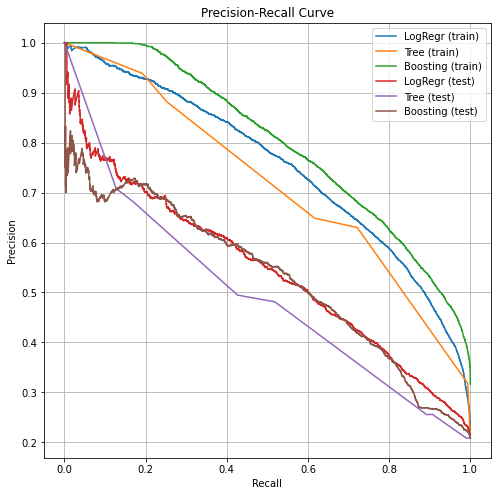

In [147]:
from sklearn.metrics import precision_recall_curve

precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, y_pred_logreg_t_p[:,1])
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, y_pred_tree_t_p[:,1])
precision_boosting, recall_boosting, thresholds_boosting = precision_recall_curve(y_test, y_pred_boosting_t_p[:,1])

precision_logreg_tr, recall_logreg_tr, thresholds_logreg_tr = precision_recall_curve(y_train, y_pred_logreg_tr_p[:,1])
precision_tree_tr, recall_tree_tr, thresholds_tree_tr = precision_recall_curve(y_train, y_pred_tree_tr_p[:,1])
precision_boosting_tr, recall_boosting_tr, thresholds_boosting_tr = precision_recall_curve(y_train, y_pred_boosting_tr_p[:,1])

fig = plt.figure(figsize=(8, 8))

plt.plot(recall_logreg_tr, precision_logreg_tr, label="LogRegr (train)")
plt.plot(recall_tree_tr, precision_tree_tr, label="Tree (train)")
plt.plot(recall_boosting_tr, precision_boosting_tr, label="Boosting (train)")

plt.plot(recall_logreg, precision_logreg, label="LogRegr (test)")
plt.plot(recall_tree, precision_tree, label="Tree (test)")
plt.plot(recall_boosting, precision_boosting, label="Boosting (test)")

plt.title("Precision-Recall Curve", )
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend();


3.3.7. We got the best model for the integral metric `AUС PR`, built on the `Logistic Regression` algorithm.

---


# CONCLUSIONS <a class="anchor" id="conc"></a>

1. We built a model for evaluating the success of a film based on various information about the film.


2. We solved the problem of binary classification, to predict two labels: 1 (successful film) or 0 (unsuccessful film).


3. We determined the success of the film by the average rating of the film on the IMDB, where films with a rating >= 7 were considered successful, and those with a rating < 7 were considered unsuccessful.


4. For training the models, we have chosen 3 classification algorithms:
    * `Logistic Regression`
    * `Decision Tree Classifier`
    * `Gradient Boosting Classifier`


5. To train and evaluate the quality of the models, we split the dataset into training and test samples in a ratio of 85:15. On the training sample, we used a 5-fold cross-validation scheme to tune the hyperparameters of the models.


6. To evaluate the quality of the models, we have chosen 4 metrics:
    * `Precision`
    * `Recall`
    * `F1 score`
    * `AUC PR`  

    As the main metric for the final analysis, we used the integral metric `AUC PR`, since it does not depend on the threshold. Threshold metrics Precision, Recall, and `F1 score` are calculated with a default threshold = 0.5, which may not be optimal for different algorithms, and may not be optimal for a business.
    At the same time, we used the `F1 score` metric to tune the hyperparameters, since a threshold metric is required to calculate the confusion matrix.


7. Before training the model, we explore and preprocess the data:
    * Removed technical and non-normative features
    * removed features with a large number of nulls and a large number of unique categorical values
    * Binorized categorical features
    * Removed One-Hot categorical features with zeros > 99%
    * Standardized numeric features
    * Made Mean Target Encoding for several categorical features  
    
    
8. The final sample includes 62 variables (including selected One-hot features)


9. To train the models, we chose hyperparameters for each algorithm to reduce the overfitting of the models and to increase the quality of the models.


10. Based on the results of training the best models, we evaluated the models' quality on the training and test samples.


11. The results showed that, according to the `AUС PR` metric, the best algorithm was `Logistic Regression`. This may be due to the fact that we did not use the methods of reducing the dimensionality of the feature space for `Gradient Boosting`, and the training sample contains many correlated features. On the other hand, in `Logistic Regression` we used the L2-regularizer, which reduces overfitting (multicollinearity)

12. We also see that `Gradient Boosting` has a higher quality than the `Decision Tree`, since the `Gradient Boosting` is an ensemble of trees that have a low bias and, due to the ensemble, reduce the variance.


12. At the same time, according to the results, we see that all models for all metrics have been overfitted quite strongly on the training set. This may be due to the fact that we did not perform a correlation analysis of features and did not remove strongly correlated features. In logistic regression, the L2-regularization parameter was tuned to combat multicollinearity, but even this parameter did not help much to reduce overfitting.


13. Further improvement of the models is possible through the use of various methods of feature selection based on `filters` and `wrappers`.


14. It is also possible to improve models by creating additional features. For example, textual data about a movie can be processed using NLP approaches such as `tf-idf` or `bag of words`. Based on the received text embeddings, new informative features can be constructed.




---

*Prepared by Sergey Afanasiev*